# UBER SUPPLY-DEMAND ASSIGNMENT
#### Aimed at  giving direction to beginners in data science: How to perform Univariate Analysis
This case study introduces to the world of univariate and segmented univariate analysis using visualizations. This is completed as part of assignment in a course by UpGrad & IIIT B data science pprogram
__`This work is meticulously documented with an intention to make beginners understand how we go about with data step by step `__ <br>

Steps include:
1. Importing libraries
2. Data import
3. Inspecting data
4. Cleaning Data
5. Deriving Metrics
6. Visualization of data
    - Univariate Analysis
    - Segmented Univariate Analysis
    - Bivariate Analysis



#### `WELCOME! To my Jupyter NoteBook`
__`Note:`__ Problem statement is given in `README`

### Importing necessary libraries

In [393]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [394]:
import pandas as pd                     # Querying library
import numpy as np                      # Numerical computing library
import matplotlib.pyplot as plt         # Visualization library
import seaborn as sns                   # Visualization library

## Task 0:  Loading  Data

In [395]:
# Reading 'Uber Request Data.csv' file into a dataframe 
uber = pd.read_csv('Uber Request Data.csv')

### Subtask 0.1: `Inspecting` data element

  1. View the dataframe.  `Syntax: df.head()`
  2. Check the dimensions of the dataframe.  `Syntax: df.shape`
  3. Understand the data types, no of non-null data to get an initial look at data attributes.  `Syntax: df.info()`
  4. Column listing to understand the metadata information of the data. `Syntax: df.columns`
  5. Descriptive statistics to understand the primary spread of the data.   `Syntax: df.describe()` 

 __*`Note:`*__  *In this work, our dataframe, `df` is __`uber`__.*

In [396]:
# 1. View the dataframe:
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [397]:
# 2. Dimensions:
uber.shape

(6745, 6)

In [398]:
# 3.Information:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


__*`Observations:`*__
- `Driver id` and `Drop timestamp` has missing data
- Data types for `date-time related columns` should be changed to __`datetime`__.

In [399]:
# 4. Columns
uber.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

**`Metadata`**  information on each column:
  1. __`Request id:`__ A unique identifier of the request
  2. __`Request timestamp:`__ The date and time at which the customer made the trip request
  3. __`Drop timestamp:`__ The drop-off date and time, in case the trip was completed 
  4. __`Pickup point:`__ The point from which the request was made
  5. __`Driver id:`__ The unique identification number of the driver
  6. __`Status:`__ The final status of the trip  (completed, cancelled by driver or no cars available)

In [400]:
# 5.1 Descriptive statistics in general:
uber.describe()

# If we compute descriptive statistics on any dtaframe, it computes the metrics on all quantitative variables by default.

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


*__`Remark:`__* *These __statistics__ carry no meaning since the `columns` are only __`ids`__.*

In [401]:
#5.2 Descriptive statistics on "Categorical Variables"
uber[['Pickup point','Status']].describe()

,Pickup point,Status
count,6745,6745
unique,2,3
top,City,Trip Completed
freq,3507,2831


**_`Observations:`_** *We may not get as much insight as we get for meaningful quantitative variables but we can get a few insights:* 

- We have __`no null values`__ in data for the stated categorical variables.(We know this from *`uber.info()`*)
- Trips from __`city`__ to __`airport`__ are greater at approx **52%** (3507/6745).
- __`Trip completed`__ tops the __`status`__ and approx. **42%** trips are *completed*. 

### Subtask 0.2: Making a `duplicate copy` of original data set

In [402]:
# Duplicate copy of 'uber' dataframe
uber_duplicate = uber.copy()

*__`Note:`__* Making a duplicate copy is to make sure that we save original data so that we can retrieve it if and when required. 

## Task 1: `Cleaning` Data

### Subtask 1.1: Inspecting for `duplicate rows`

In [403]:
# Let us check and delete the duplicates if any.
uber.duplicated().sum()          # Output: 0, when no duplicates
# or
uber.duplicated().value_counts() # Output: False 6745, All rows are unique (another way of confirming no duplicates)

False    6745
dtype: int64

__*`Remarks:`*__ There are `no duplicate rows` to drop. 

### Subtask 1.2: Inspecting `Column-wise Null values`

In [404]:
# To get the total number of null values in each column:
column_wise_null_values = uber.isnull().sum(axis = 0)

# To get the percentage of null values in each column:
column_wise_percent_null_values = (column_wise_null_values/uber.shape[0])*100

# Summary dataframe:
column_wise_null_summary = pd.concat([column_wise_null_values,column_wise_percent_null_values], axis = 1)
column_wise_null_summary.columns = ['Total null values', 'Percent null values']

# Display:
column_wise_null_summary

,Total null values,Percent null values
Request id,0,0.000000
Pickup point,0,0.000000
Driver id,2650,39.288362
Status,0,0.000000
Request timestamp,0,0.000000
Drop timestamp,3914,58.028169


__*`Observation:`*__ 
1. Null values in __`Drop timestamp`__ are as high as __58%__. But it is inappropriate to drop this column here for 2 reasons
    
    - `Airport drop-time` might be an important factor to `analyze driver waiting times and consequent cancellations` . 
    - If data is missing mostly from `city drop-time`, it won't effect the analysis to keep the null values as it is. 
   
2. Null values in __`Driver id`__ do not effect the analysis since our `focus is not on individual drivers`.

__*`Remarks:`*__ 
- So far, I don't find any necessity in deleting column-wise data. Let's think of `alternative approach to impute data` if we find it necessary in future.
- Chances are, `keeping the values as it is won't have any adverse effect on analysis`.

### Subtask 1.3: Inspecting `Row-wise Null values`

In [405]:
# To get the row-wise null value distribution:
row_wise_null_values = uber.isnull().sum(axis = 1)
row_wise_null_values.value_counts()

0    2831
2    2650
1    1264
dtype: int64

__*`Observation:`*__ 
1. The row-wise missing values exactly match the sum of column-wise missing values. `No over-lap`.
2. `No rows with all the rows missing.`

__*`Remarks:`*__ 
- For time being, let us not delete any rows. Let us impute at a later time if necessary.
- Chances are, `keeping the values as it is won't have any adverse effect on analysis`.

### Subtask 1.4: `Date-Time` formating 

In [406]:
# Changing generic object data type to 'datetime' object in the following columns
# 1. Request timestamp
uber['Request timestamp'] = pd.to_datetime(uber['Request timestamp'])
# 2. Drop timestamp
uber['Drop timestamp'] = pd.to_datetime(uber['Drop timestamp'])

#### Inspecting dataframe changes using
1. `head()` to see whether it is uniformly formattted
2. `dtypes` to check the data type change

In [407]:
# Verifying Formatting
uber.head(2)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00


In [408]:
# Verifying data type of date columns 
uber[['Request timestamp','Drop timestamp']].dtypes

Request timestamp    datetime64[ns]
Drop timestamp       datetime64[ns]
dtype: object

__*`Remarks:`*__ Uniform formatting of all date-time based columns is complete

### Subtask 1.5: Creating `derived metrics` 

__`Derived Variables:`__ As part of the analysis. Let us divide date-time stamps in the dataframe into distinct date and time stamp for each column.

1. *__`Request timestamp:`__* `Request date` + `Request time`
    1. *__`Request date:`__* Retrieve `date` from Request timestamp 
    2. *__`Request time:`__*  Retrieve `time` from Request timestamp
    3. *__`Request hour:`__* Retrieve `hour` from Request timestamp  
   
    

2. *__`Drop timestamp:`__* `Drop date` + `Drop time`
    1. *__`Drop date:`__* Retrieve `date` from Drop timestamp
    2. *__`Drop time:`__*  Retrieve `time` from Drop timestamp
    3. *__`Drop hour:`__* Retrieve `hour` from Drop timestamp  
   
    

3. __*`Request time slot:`*__ as another derived categorical variable with defining `hrs` between.
    1. `Early morning:` Between 4 - 8  
    2. `Morning:`  Between 8 - 12
    3. `Afternoon:` Between 12 -  16
    4. `Evening:` Between 16 - 20
    5. `Night:` Between 20 to 23 and 23 - 0
    6. `Late Night:` Between 0 - 4

__*`Remarks:`*__
1. `Request time/hour`,`Drop time/hour` might help in performing `univariate analysis on time slots` independent of dates to get a closer `view on supply demand scenario` at different time slots in any given day (Ex: morning, afternoon, midnight, like-wise).

2. Let us try and make a 'Categorical Analysis' on 'Request time slot.'


In [409]:
#1. Deriving variables from 'Request timestamp'
# 1.A 'Request date'
uber['Request date'] = uber['Request timestamp'].dt.date
# 1.B 'Request time'
uber['Request time'] = uber['Request timestamp'].dt.time
# 1.C 'Request hour'
uber['Request hour'] = uber['Request timestamp'].dt.hour


#2. Deriving variables from 'Drop timestamp'
# 2.A 'Drop date'
uber['Drop date'] = uber['Drop timestamp'].dt.date
# 2.B 'Drop time'
uber['Drop time'] = uber['Drop timestamp'].dt.time
# 2.C 'Drop hour'
uber['Drop hour'] = uber['Drop timestamp'].dt.hour


In [410]:
# Deriving `Request time slot`
uber = uber.assign(Request_time_slot = pd.cut(uber['Request hour'],[-1,4,8,12,16,20,24],labels = ['Late Night','Early Morning','Morning','Afternoon','Evening','Night']))
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request date,Request time,Request hour,Drop date,Drop time,Drop hour,Request_time_slot
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,11:51:00,11,2016-11-07,13:00:00,13.0,Morning
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,17:57:00,17,2016-11-07,18:47:00,18.0,Evening
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,09:17:00,9,2016-12-07,09:58:00,9.0,Morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,21:08:00,21,2016-12-07,22:03:00,22.0,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,8,2016-07-13,09:25:47,9.0,Early Morning


#### Inspecting dataframe changes using
1. `head()` to see 
2. `info()` to verify the data type change

In [411]:
# 1. Viewing dataframe
uber.head(2)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request date,Request time,Request hour,Drop date,Drop time,Drop hour,Request_time_slot
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,11:51:00,11,2016-11-07,13:00:00,13.0,Morning
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,17:57:00,17,2016-11-07,18:47:00,18.0,Evening


In [412]:
# 2. Verifying datatypes of new columns
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 13 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
Request date         6745 non-null object
Request time         6745 non-null object
Request hour         6745 non-null int64
Drop date            2831 non-null object
Drop time            2831 non-null object
Drop hour            2831 non-null float64
Request_time_slot    6745 non-null category
dtypes: category(1), datetime64[ns](2), float64(2), int64(2), object(6)
memory usage: 639.2+ KB


#### Date-time formatting of derived metrics/variables

In [413]:
# Changing generic object data type of derived metrics/variables to 'datetime' object in the following columns
# 1.1 Request date
uber['Request date'] = pd.to_datetime(uber['Request date'])

# 2.1 Drop date
uber['Drop date'] = pd.to_datetime(uber['Drop date'])

#### Inspecting data-type changes using dtypes

In [414]:
uber[['Request date','Drop date']].dtypes

Request date    datetime64[ns]
Drop date       datetime64[ns]
dtype: object

## Task 2: `Visualization` of data

### Subtask  2.1: Frequency analysis of `Categorical Variables`
### Subtask 2.1.1: `Univariate analysis` of:
 1. __*`Status:`*__ The frequency distribution of this suggests whether
     1. __*`No Cars Available`:*__ There is no supply at any given time-slots
     2. __*`Cancelled`:*__ The drivers are not willing to attend the request
 

### Subtask 2.1.2: `Segmented Univariate analysis` of:
 1. __*`Status w.r.t pickup point:`*__ The frequency distribution of this suggests whether `there is a dearth of cars is from airport or to airport`.
 
     1. __*`No Cars Available`:*__ There is no supply at any given location
     2. __*`Cancelled`:*__ The drivers are not willing to attend the request

__*Note:*__  
1. *As we further discuss in comments , Categorical variables have only count, so we use `countplot()` instead of `boxplot()`.*
2. *In here, only `Cancelled`  and `No cars available` status are represented graphically. (I found no meeaning in representing `Trip completed` in this univariate analysis - no added value )*

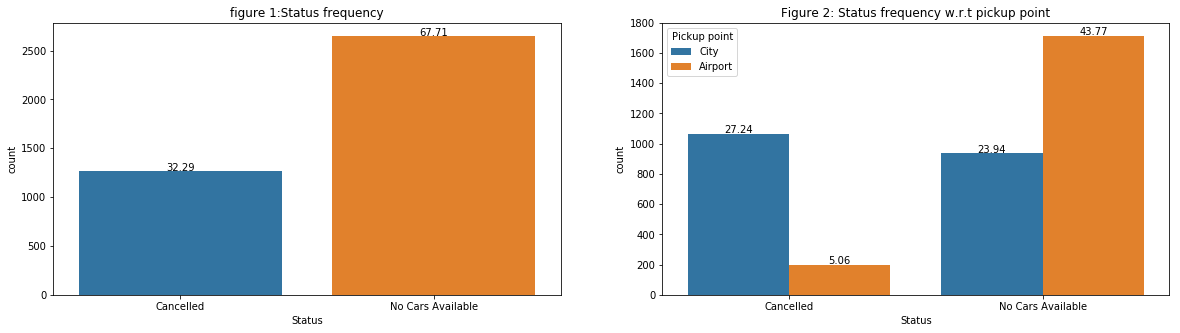

In [415]:
# Let us do the analysis for the above mentioned anamoly/undesired statuses.
# Data was taken into another dataframe to avoid data corruption in uber (main dataframe)
uber_status_anamolies = uber[uber['Status'] != 'Trip Completed']

# Subtask 2.1.1: Univariate/Frequency analysis of Categorical Variable (Status)
# Note: Any frequency/descriptive analysis of categorical variables is limited to understanding 
# "Count: How many times a particular category alias activity is frequented/repeated in the data."


# Subplot 1: Univariate analysis on categorical variable 'Status'.
plt.figure(figsize=(20, 5))                               # Figure Size
plt.subplot(1, 2, 1)                                       # Subplot positioning
ax = sns.countplot(x="Status", data=uber_status_anamolies) # Plot definition
plt.title("figure 1:Status frequency")                              # Plot title

# Plot formatting adding % of each category data as bar index on top for understanding
total = float(len(uber_status_anamolies))       
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,                    # Formatting
            height + 5,
            '{:1.2f}'.format((height/total)*100),          # % calculation only in undesired statuses
            ha="center") 
    
# Subtask 2.1.2: Segmented univariate analysis on categorical variable w.r.t pick-up point    

# subplot 2: Status frequency w.r.t pickup point (Segmented univariate analysis)

plt.subplot(1, 2, 2)                                       # Subbplot positioning
ax1 = sns.countplot(x='Status',            
              hue='Pickup point', 
                    data= uber_status_anamolies)           # Plot definition
plt.title("Figure 2: Status frequency w.r.t pickup point")  

# Plot formatting adding % of each category data as bar index on top for understanding
total = float(len(uber_status_anamolies))       
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,                   # Formatting
            height + 5,
            '{:1.2f}'.format((height/total)*100),          # % calculation on undesired statuses
            ha="center") 

plt.show()


# Saving plots:
fig = ax.get_figure()
fig.savefig('E:/Status_frequency.png')

__*`Remarks:`*__
1. The number headings on top of the bars are `% of times each status applied to a request w.r.t total requests recording "No cars available" and "Canceled" status`
2. `Subplot 1:` Typically, Cars are not available more than double the times to cancellations by driver/customer.
3. `Subplot 2:` It's a segmented univariate analysis  from `City to airport` and `Airport to City`
    1. `Cancellations from airport` are very less (only 5%)
    2. Both `Cancellations and Non-availability` relatively equally plays a role in supply-demand gap from `city to airport` together owning to more  than 50% times.
    3. Customers `booking from airports`having hard time finding a car mostly due to their `Non availability`
    4. Supply-demand gap is almost equal from `Airport to city` or  `City to airport`.
       

### Subtask 2.1.3: `Segmented Univariate analysis` of:
 1. __*`Status w.r.t Request_time_slots:`*__ The frequency distribution of this helps to locate the specific characterestic of supply demand in different slots of a day. 
 
     1. __*`No Cars Available`:*__ In which periods of day, there is high demand than supply.
     2. __*`Cancelled`:*__ When drivers are unwilling to take the request.

__*`Note:`*__ *I am planning to restrict even this analysis tothe atypical statuses - `Cancelled` and `No Cars Available`.*

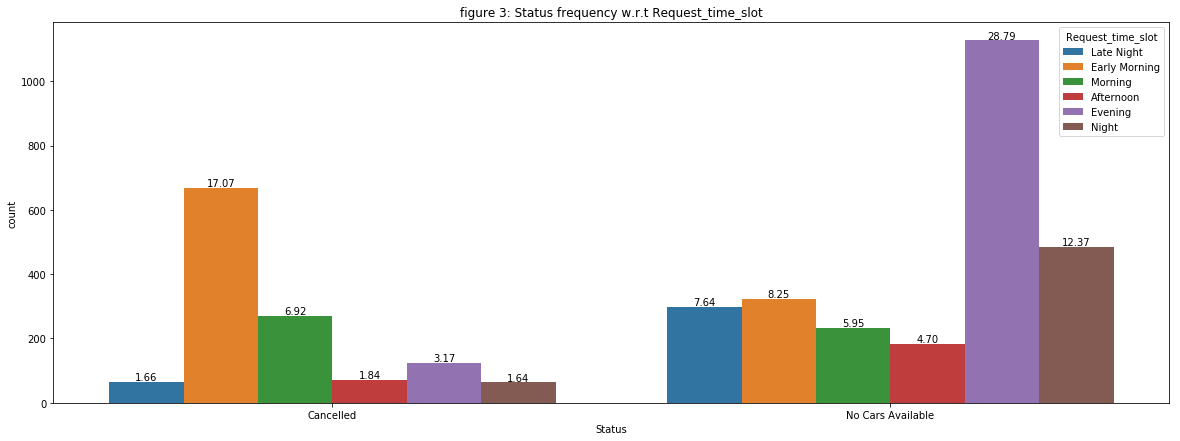

In [416]:
# Subtask 2.1.3: Segmented univariate analysis on categorical variable w.r.t time slots    

# subplot 2: Status frequency w.r.t Request_time_slots (Segmented univariate analysis)

plt.figure(figsize=(20, 7))                               # Figure Size
ax2 = sns.countplot(x='Status',            
              hue='Request_time_slot', 
                    data= uber_status_anamolies)           # Plot definition
plt.title("figure 3: Status frequency w.r.t Request_time_slot")  

# Plot formatting adding % of each category data as bar index on top for understanding
total = float(len(uber_status_anamolies))       
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,                   # Formatting
            height + 5,
            '{:1.2f}'.format((height/total)*100),          # % calculation on undesired statuses
            ha="center") 

plt.show()

fig = ax2.get_figure()
fig.savefig('E:/Status_frequency_request_time.png')

__*`Remarks:`*__ 
1. `Cancellations:` They may be from `Driver side` or `Customer side`.
    - Since there are more prominent early morning, i would expect driver is cancelling the trip rather than vice-versa.
    - Adding with the fact from previous chart (Status frequency w.r.t pick-up point), we learnt `City to Airport` cancellations are more. 
    - `Conclusion:` __Drivers are not willing to go to airport in the early morning. 
    - *`Suggestion`*: __Incentivizing the driver by covering the cost of waiting time before another request comes might actually help him__
2. `No cars available:` From previous charts, these are majorly from `Airport` but `City to Airport` also contributes substantially here.
    - One can say, inflow of flights will ve more at `evenings` which might short the supply
    - From `City to airport`, There ay be people going to places ohter than aiport (like home from offices) which will result in shortage. 
    - `Conclusion:` __Evening can be considered prime time.
    - *`Suggestion`*: __More drivers from previous shifts should be pursuaded to do couple more hours and drivers from later shifts should be asked to join the pool a couple of  hrs early.__

### Subtask 2.2: `Supply-Demand Gap` (A bivariate Analysis)
__*`Understanding the objective:`*__
1. Find the time slots when the highest gap exists:
    - It helps to find `Trips Completed Vs 'All 3 status quos'`representation for each of the `Request_time_slot`independently.  
2. Find the types of requests (city-airport or airport-city) for which the gap is the most severe in the identified time slots
    - It helps to find `Trips Completed Vs 'All 3 Status quos'`representation for each of `Pickup points` the  independently.

__*Note:*__ 
1. *If we see it, `trips completed` meaning there is a `supply`.*
2. *`Total requests raised` combaining all status quos is the `demand`. 

### Subtask 2.2.1: Supply-Demand Gap in `Requested Time Slot`

In [417]:
# Dataframe grouped by `Requested time slots`
# 1. Total demand dataframe computation
uber_demand_wrt_time = uber.groupby('Request_time_slot').size()

# 2. Total Supply dataframe computation
uber_status_tripcompleted = uber[uber['Status'] == 'Trip Completed']
uber_supply_wrt_time = uber_status_tripcompleted.groupby('Request_time_slot').size()

# Derived Metrics: Percentage Supply for it's total demand in every slot: 
uber_supply_demand_gap_percent_wrt_time = (1 - (uber_supply_wrt_time/uber_demand_wrt_time))*100

# Make a master dataframe of supply demand statistics in each of the 'request_time_slot'
uber_supply_demand_stats_wrt_time = pd.concat([uber_demand_wrt_time,uber_supply_wrt_time,uber_supply_demand_gap_percent_wrt_time], axis = 1 )
uber_supply_demand_stats_wrt_time.rename(columns= {0:'Demand',1:'Supply',2:'Supply-demand gap Percent'},inplace = True)

uber_supply_demand_stats_wrt_time

,Demand,Supply,Supply-demand gap Percent
Request_time_slot,,,
Late Night,578,214,62.975779
Early Morning,1672,681,59.270335
Morning,1029,525,48.979592
Afternoon,626,370,40.894569
Evening,1893,642,66.085578
Night,947,399,57.866948


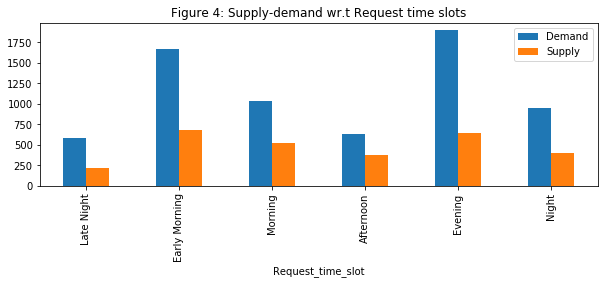

In [418]:
# Subtask 2.2.1: Segmented bivariate analysis on categorical variable w.r.t time slots    
# Plot : Supply-demand w.r.t Request_time_slots (Segmented bivariate analysis)
ax3 = uber_supply_demand_stats_wrt_time.plot(y=["Demand","Supply"], 
                                   kind="bar",
                                   use_index = True, 
                                   title = 'Figure 4: Supply-demand wr.t Request time slots',
                                  figsize=(10, 3))           # Plot definition
fig = ax3.get_figure()
fig.savefig('E:/Supply_demand_time.png')

__*`Remarks:`*__
1. Highest `Supply-Demand gap` exists in __`Evening`__ w.r.t `Request time slots`
2. Second inline is __`Early Morning`__
3. To cross check `Supply-Demand Percent gap`, please check the dataframe formulated in the previous cell by computing the statistics

### Subtask 2.2.2: Supply-Demand Gap in `Requested time slots` w.r.t `Pickup points`

In [419]:
# Dataframe grouped by `Pickup points`
# 1. Total demand dataframe computation
uber_demand_wrt_pickup = uber.groupby(['Request_time_slot','Pickup point']).size()

# 2. Total Supply dataframe computation
uber_status_tripcompleted = uber[uber['Status'] == 'Trip Completed']
uber_supply_wrt_pickup = uber_status_tripcompleted.groupby(['Request_time_slot','Pickup point']).size()

# Derived Metrics: Percentage Supply for it's total demand in every slot: 
uber_supply_demand_gap_percent_wrt_pickup = (1 - (uber_supply_wrt_pickup/uber_demand_wrt_pickup))*100

# Make a master dataframe of supply demand statistics in each of the 'request_time_slot'
uber_supply_demand_stats_wrt_pickup = pd.concat([uber_demand_wrt_pickup,uber_supply_wrt_pickup,uber_supply_demand_gap_percent_wrt_pickup], axis = 1 )
uber_supply_demand_stats_wrt_pickup.rename(columns= {0:'Demand',1:'Supply',2:'Supply-demand gap Percent'},inplace = True)

uber_supply_demand_stats_wrt_pickup

Demand  Supply  Supply-demand gap Percent
Request_time_slot Pickup point                                           
Late Night        Airport          253     103                  59.288538
                  City             325     111                  65.846154
Early Morning     Airport          337     308                   8.605341
                  City            1335     373                  72.059925
Morning           Airport          315     239                  24.126984
                  City             714     286                  59.943978
Afternoon         Airport          252     162                  35.714286
                  City             374     208                  44.385027
Evening           Airport         1457     312                  78.586136
                  City             436     330                  24.311927
Night             Airport          624     203                  67.467949
                  City             323     196                  39.318885

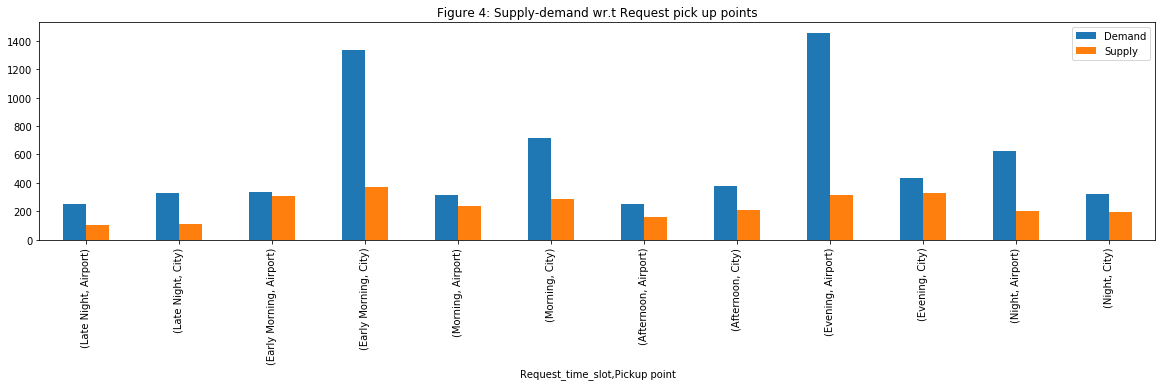

In [420]:
# Subtask 2.2.2: Segmented bivariate analysis on categorical variable w.r.t 'Pickup points'   
# Plot : Supply-Demand w.r.t 'Pickup points' (Segmented bivariate analysis)
ax4 = uber_supply_demand_stats_wrt_pickup.plot(y=["Demand","Supply"], 
                                   kind="bar",
                                   use_index = True, 
                                   title = 'Figure 4: Supply-demand wr.t Request pick up points',
                                  figsize=(20, 4))   # Plot definition
fig = ax4.get_figure()
fig.savefig('E:/Supply_demand_pickup.png')

__*`Remarks:`*__ By far, in bivariate analysis, we get `Evening` and `Early Morning` as the first highest in order supply-demand gap zones.
1. In connection with that:As we estimated previously w.r.t `Status`,
    1. __`Early Morning from city to airport.`__
    2. __`Evening from airport to city`__


__*`Concluding Remarks:`*__  
1. `Early morning` from `City-Airport` due to `driver cancellations`.
2. `Evening` from `Airport-City` due to `Non Availability`
    - *`Proable  Reason 1:`* *More inflow  of flights*
    - *`Proable  Reason 2:`* *Other-wise heavy requests from with city-city front*

__*`Recommendations:`*__
1. For `Non Availability:`
    1. Ask the drivers from `afternoon and night shifts` to adjust a couple of hours after and before their regular shift timings.
    2. Incentivize them with some additional benefits if logging in early. `Prioritize such active drivers with requests`.
2. For `Cancellations:`
    1. Incentivize the drivers by paying for the `waiting times` at airport.
    2. Ask the morning shift drivers nearest to airport to `start their day from airport`.